# Finance Data Capstone Project

~~You are going to analyze some financial data in this project. Specifically, you'll see how some banks were affected by the subprime mortgage debackle some years back, and see how they are faring today.~~

~~A new technique in this project is reading stock data from the internet -- in this case, Google Finance. To do that, first you need to install a package called `pandas-datareader`, which makes getting that kind of information off of the internet and into a `DataFrame` a breeze. Do that now, along with all of the other necessary imports.~~

**UPDATE!**

The web is becoming a less wonderful place in some ways. The most accessible APIs for getting historical data have all been discontuned, leaving nothing that is both free and practical. You did good work writing some terse, yet readable code for gathering and munging the data, but it was all for naught.

Fortunately, the instructor has included a pickle file with all of the data needed for the following tasks. It's not as rewarding as gathering it yourself, but it'll have to do.

For now, do the necessary imports and read the pickle file (already uploaded into this directory) into a `DataFrame`. For further reference, the ticker symbols represent the following banks:

* Bank of America (BAC)
* CitiGroup (C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

banks = pd.read_pickle('all_banks.pkl')

In [2]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [3]:
banks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

Not terribly satisfying to just have the data given to you that way, but there's nothing to be done about it. Let's move in to data analysis. Find the maximum closing price for each bank during the time period.

You'll need to use the `df.xs()` method which returns a cross section of a `DataFrame`. Your first argument is the label that you want to pull, in this case `Close`. The second argument points out which index level you want to get it from (if you're working with a multi-level index, and the final argument says which axis to use. It defaults to 1, which is rows. In this case you want to use `axis=1` which tells pandas to make a cross section from the columns.

In [4]:
close_xs = banks.xs('Close', level='Stock Info', axis=1)
close_xs.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [5]:
close_xs.max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Good. Now you're going to do some calculations with the returns. That information is not present in the current data, however, so you will have to calculate it. The equation is below:

$$r_t = \frac{p_t}{p_{t-1}} - 1$$

This simplt states that the return at a price is equal to that price divided by the previous price, minus one. Lucky for you, you don't have to type this equation in manually because pandas `df.pct_change()` method does this for you.

Make a new `DataFrame` called `returns`. Use the `df.pct_change()` method to populate it with the returns for each of the banks. There might be a way to do the declaration and calculation in one line, but a for loop will be more readable and no slower. Also, rename the columns to reflect the kind of data they are showing.

In [6]:
returns = pd.DataFrame()
for x in close_xs.columns:
    returns[x] = close_xs[x].pct_change()
returns.columns = [b + ' Returns' for b in close_xs.columns]
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Good, now make a pairplot of this dataset. You will have to exlude the first row by using `.iloc[1:]` or seaborn will throw a fit.

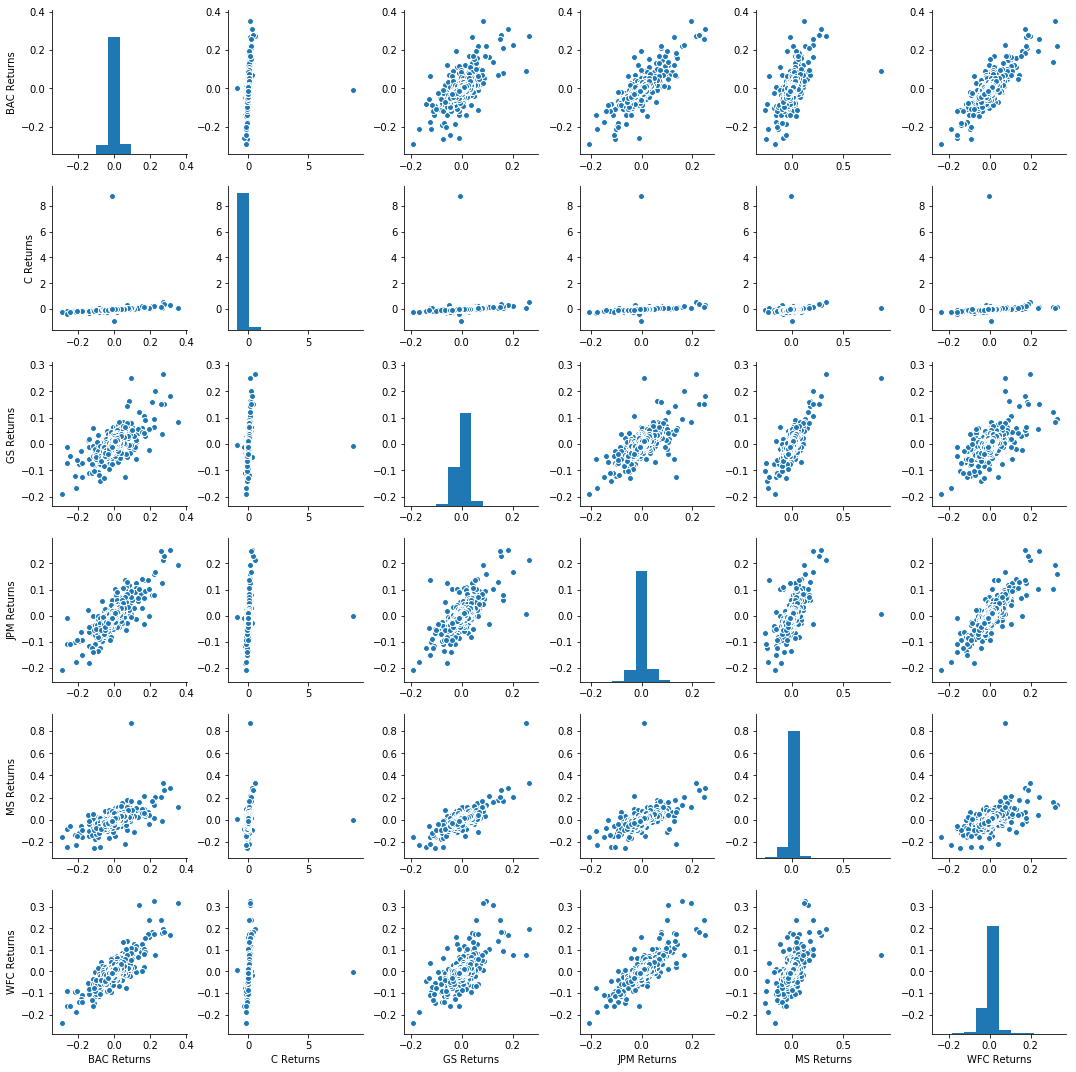

In [10]:
sns.pairplot(returns[1:])

Citigroup is the clear outlier here, but why? Your next step can offer some illumination. Use this returns data to find the best single day returns for each bank, and then find the worst single day returns.

In [25]:
print("Best returns")
display(returns.idxmax())

print("Worst returns")
display(returns.idxmin())

Best returns


BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

Worst returns


BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

If you look at the dates carefully, you'll see that Citigroups best and worst single day returns are awfully close together. Put those two dates into a single output.

In [32]:
print("Citigroup's worst single day return: ", returns['C Returns'].idxmin())

print("Citigroup's best single day return: ", returns['C Returns'].idxmax())

Citigroup's worst single day return:  2011-05-06 00:00:00
Citigroup's best single day return:  2011-05-09 00:00:00


The difference was just a few days -- how interesting! What happened was that Citigroup's stocks were trading at a terribly low value due to the financial crisis. Their solution was to perform a *reverse stock split*, (also known as a *stock merge*). This caused multiple shares to be combined into smaller number of higher-value shares. I'm not qualified to comment on how effective this strategy was.

During this time the stock prices of all the banks trended upwards, but some of the rides were bumpier than others. Calculate the standard deviation for each bank over the entire time period and sort the values while you are at it. This is a built-in function with pandas, but it's nice to see the euqation just as a refresher:

$$
\huge
\sigma = \sqrt
    {
        \frac{\sum_{i=1}^N (x_i - \overline{x})^2}
             {N-1}
    }
$$

Keep in mind that in this case we have access to all of the data that we are interested in, so we are able to get a true standard deviation, rather than a sample standard deviation, which would be the case if we were trying to esitmate its value from a (hopefully) representative sample.

In [34]:
returns.std().sort_values()

GS Returns     0.025346
JPM Returns    0.027656
WFC Returns    0.030233
BAC Returns    0.036650
MS Returns     0.037820
C Returns      0.179969
dtype: float64

Certainly Citibank is the outlier here and would have seemed a very risky investment. Now calculate the standard deviations for the each bank, for each year.

This is a good time to use `df.resample()`. This method can aggregate timeseries data into bins, like a special kind of `df.groupby()` method. In this case you want to group the data by year and standard deviation.

In [42]:
returns.resample('A').std()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-12-31,0.008008,0.009077,0.014856,0.010735,0.012634,0.008097
2007-12-31,0.013765,0.018278,0.021535,0.016821,0.024866,0.016936
2008-12-31,0.062934,0.073573,0.050015,0.053134,0.087604,0.052439
2009-12-31,0.077839,0.079363,0.038187,0.051184,0.051127,0.066828
2010-12-31,0.023139,0.023958,0.019354,0.019368,0.021046,0.021313
2011-12-31,0.036480,0.556662,0.023708,0.025259,0.037460,0.024375
2012-12-31,0.024637,0.022897,0.017982,0.018103,0.024542,0.013870
2013-12-31,0.014823,0.014454,0.013543,0.012038,0.017797,0.010024
2014-12-31,0.013625,0.012873,0.010908,0.011266,0.013665,0.008839


Use this to make a heatmap!

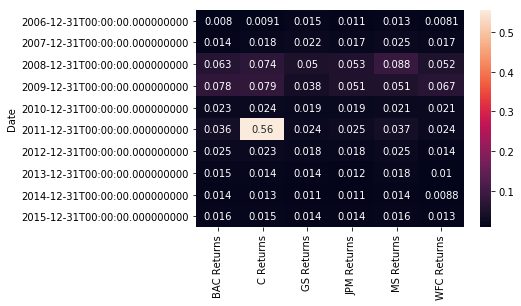

In [49]:
sns.heatmap(returns.resample('A').std(), annot=True)

Create a histogram (`sns.distplot`) of Margon Stanley's returns for the year 2015.

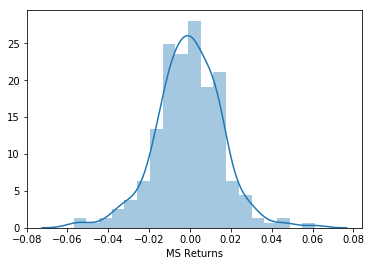

In [56]:
sns.distplot(returns['MS Returns'].iloc[1:].loc['2015-01-01':'2015-12-31'])

Create a histogram of Citigroup's 2008 returns.

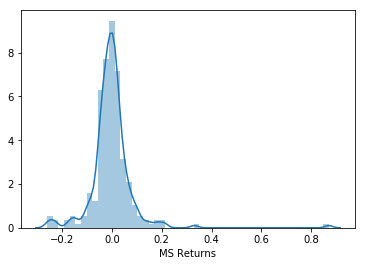

In [55]:
sns.distplot(returns['MS Returns'].iloc[1:].loc['2008-01-01':'2008-12-31'])

Pretty heavily skewed isn't it?

Are you ready for a visualization challenge? Of course you are!

Make a line plot that shows each bank's closing price over the whole time period. Remember that you already made `close_xs` which is a `DataFrame` that hold all of the relevant data.

In [59]:
close_xs.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


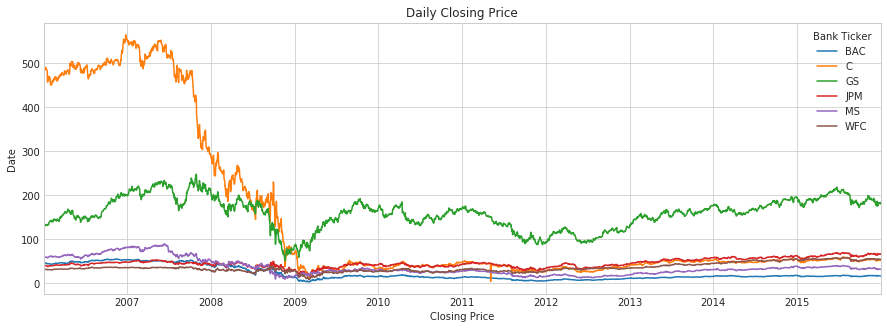

In [92]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(close_xs)
ax.set_title('Daily Closing Price')
ax.set_xlabel('Closing Price')
ax.set_ylabel('Date')
ax.set_xlim(close_xs.index[0], close_xs.index[-1])
ax.legend(close_xs.columns, title='Bank Ticker')

Brilliant! You make that look easy.

You could spend ages going over this data and making all sorts of cool-looking plots, but it's time to move on. From this point forward we're going to working on machine learning. Finally!